# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator
import datetime
%matplotlib inline

# Data import and preparation
High level view of the content. Not all available data tables will be needed for the project, only: Order, Order Items, Order review and Prodcuts

In [26]:
df_orders = pd.read_csv("olist_orders_dataset.csv")
df_order_items = pd.read_csv("olist_order_items_dataset.csv")
df_order_review = pd.read_csv("olist_order_reviews_dataset.csv")
df_products = pd.read_csv("olist_products_dataset.csv")

## Order data

In [3]:
df_orders.describe().transpose()

,count,unique,top,freq
order_id,99441,99441,c1fbc7155ea9f5c6249e998ab25708a6,1
customer_id,99441,99441,1ca5cecc5fbe7750a4b20cd25e3bdefc,1
order_status,99441,8,delivered,96478
order_purchase_timestamp,99441,98875,2018-08-02 12:06:09,3
order_approved_at,99281,90733,2018-02-27 04:31:10,9
order_delivered_carrier_date,97658,81018,2018-05-09 15:48:00,47
order_delivered_customer_date,96476,95664,2017-12-02 00:26:45,3
order_estimated_delivery_date,99441,459,2017-12-20 00:00:00,522


In [4]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
len(df_orders['order_id'].unique())

99441

In [6]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


The order data table contains order IDs with timestamps and customer. A few missing data in the date fields. Date will need to be formatted as datetime.

Important for our project are order purchase data and delivery date. We convert these two columns into datetime format:

In [27]:
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'], format='%Y-%m-%d').dt.date

In [29]:
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'], format='%Y-%m-%d').dt.date

In [31]:
df_orders['order_estimated_delivery_date']

0        2017-10-18
1        2018-08-13
2        2018-09-04
3        2017-12-15
4        2018-02-26
            ...    
99436    2017-03-28
99437    2018-03-02
99438    2017-09-27
99439    2018-02-15
99440    2018-04-03
Name: order_estimated_delivery_date, Length: 99441, dtype: object

Adding a new feature 'delivery_time' which contains the delivery duration from order to delivery:

In [32]:
df_orders['delivery_time'] = df_orders['order_estimated_delivery_date'] - df_orders['order_purchase_timestamp']

checking delivery times:

<AxesSubplot:xlabel='delivery_time'>

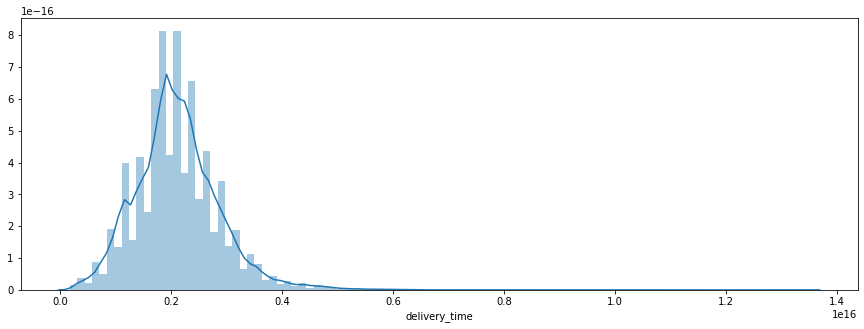

In [36]:
plt.figure(figsize=(15,5))
sns.distplot(df_orders['delivery_time'], bins=100)

## Taking a look at the order item data

In [12]:
df_order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [13]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [14]:
len(df_order_items['order_id'].unique())

98666

Contains the order in detail with SKUs, seller and prices. No missing data, data formats appear to be set correctly. The order ID count is higher than in the order data which is would appear logic as oders will sometimes contain more than one order line. But in reality, there are more than 700 order IDs missing as the count of unique values shows.

### Taking a look at the order review data

In [15]:
df_order_review.describe()

,review_score
count,100000.000000
mean,4.070890
std,1.359663
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [16]:
df_order_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [17]:
len(df_order_review['review_id'].unique())

99173

In [18]:
len(df_order_review['order_id'].unique())

99441

The lookup table contains review scores of orders along with the message and dates. There are a few more reviews listed than unique order IDs in the order file, even so the unique count matches. We will take a look at that. Many missing comments (less than 50%).

### Taking a look at the products

In [19]:
df_products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [20]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [21]:
len(df_products['product_id'].unique())

32951

In [22]:
len(df_products)

32951

The lookup table contains the products, their description and physical properties. There are no duplicated records and the data formats are ok.